Importing Required Libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Loading Dataset


In [18]:
df = pd.read_csv("House Price India.csv")

In [19]:
df


,Number of bedrooms,Number of bathrooms,Area,number of floors,Built Year,Price
0,5,2.50,9050,2.0,1921,2380000
1,4,2.50,4000,1.5,1909,1400000
2,5,2.75,9480,1.5,1939,1200000
3,4,2.50,42998,2.0,2001,838000
4,3,2.00,4500,1.5,1929,805000
...,...,...,...,...,...,...
14615,2,1.50,20000,1.0,1957,221700
14616,3,2.00,7000,1.5,1968,219200
14617,2,1.00,6120,1.0,1962,209000
14618,4,1.00,6621,1.0,1955,205000


<Axes: >

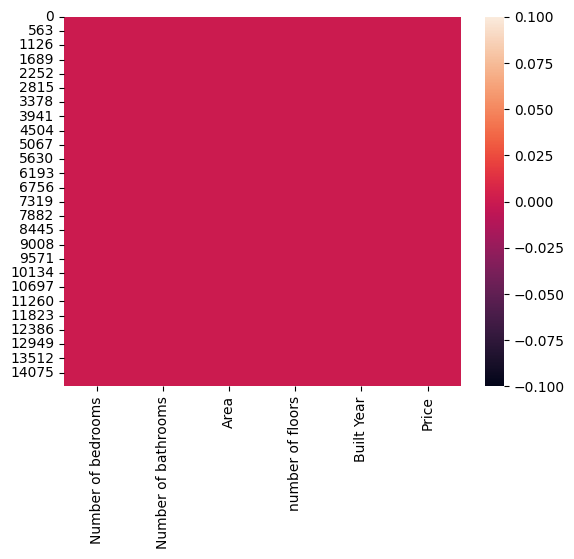

In [20]:
#Checking Null Values
sns.heatmap(df.isnull())

No Null Values are here

**Train Test Split**

In [21]:
X = df.drop('Price',axis=1)
Y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30)

In [22]:
#Training the Model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [23]:
#Predicting the Price
predictions = model.predict(X_test)

In [24]:
predictions

array([ -4274.33021448, 819712.97328813, 843813.26952348, ...,
       425015.62572972, 348348.23724849, 240147.66432564], shape=(4386,))

**Evaluation**

In [25]:
error = np.sqrt(metrics.mean_absolute_error(Y_test,predictions))

In [26]:
error

np.float64(430.6028195313127)

In [27]:
import pickle

# Assuming your model is named 'lm' (commonly used for LinearRegression)
pickle.dump(model, open('house_price_model.pkl', 'wb'))
